# Random Forest with Gabor and Sobel Filters - Extraction Classification of     Flooding and Regular State

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2
import os
import seaborn as sns
import pandas as pd
from skimage.filters import sobel

In [2]:
print(os.listdir("C:/Users/training/"))

['Flooding', 'Regular_State']


## 1. Preprocessing images and converting them into numpy arrays for Training&Testing

In [3]:
#Capture images and labels into arrays.
#Start by creating empty lists.
train_images = []
train_labels = [] 
for directory_path in glob.glob("C:/Users/training/*"):
    label = directory_path.split("\\")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE) #Reading grayscale images
        img = cv2.resize(img, (64, 64))#Resize images
        train_images.append(img)
        train_labels.append(label)

Flooding
C:/Users/training\Flooding\Flooding_0001.png
C:/Users/training\Flooding\Flooding_0002.png
C:/Users/training\Flooding\Flooding_0003.png
C:/Users/training\Flooding\Flooding_0004.png
C:/Users/training\Flooding\Flooding_0005.png
C:/Users/training\Flooding\Flooding_0006.png
C:/Users/training\Flooding\Flooding_0007.png
C:/Users/training\Flooding\Flooding_0008.png
C:/Users/training\Flooding\Flooding_0009.png
C:/Users/training\Flooding\Flooding_0010.png
C:/Users/training\Flooding\Flooding_0011.png
C:/Users/training\Flooding\Flooding_0012.png
C:/Users/training\Flooding\Flooding_0013.png
C:/Users/training\Flooding\Flooding_0014.png
C:/Users/training\Flooding\Flooding_0015.png
C:/Users/training\Flooding\Flooding_0016.png
C:/Users/training\Flooding\Flooding_0017.png
C:/Users/training\Flooding\Flooding_0018.png
C:/Users/training\Flooding\Flooding_0019.png
C:/Users/training\Flooding\Flooding_0020.png
C:/Users/training\Flooding\Flooding_0021.png
C:/Users/training\Flooding\Flooding_0022.png
C

C:/Users/training\Flooding\Flooding_0184.png
C:/Users/training\Flooding\Flooding_0185.png
C:/Users/training\Flooding\Flooding_0186.png
C:/Users/training\Flooding\Flooding_0187.png
C:/Users/training\Flooding\Flooding_0188.png
C:/Users/training\Flooding\Flooding_0189.png
C:/Users/training\Flooding\Flooding_0190.png
C:/Users/training\Flooding\Flooding_0191.png
C:/Users/training\Flooding\Flooding_0192.png
C:/Users/training\Flooding\Flooding_0193.png
C:/Users/training\Flooding\Flooding_0194.png
C:/Users/training\Flooding\Flooding_0195.png
C:/Users/training\Flooding\Flooding_0196.png
C:/Users/training\Flooding\Flooding_0197.png
C:/Users/training\Flooding\Flooding_0198.png
C:/Users/training\Flooding\Flooding_0199.png
C:/Users/training\Flooding\Flooding_0200.png
C:/Users/training\Flooding\Flooding_0201.png
C:/Users/training\Flooding\Flooding_0202.png
C:/Users/training\Flooding\Flooding_0203.png
C:/Users/training\Flooding\Flooding_0204.png
C:/Users/training\Flooding\Flooding_0205.png
C:/Users/t

C:/Users/training\Flooding\Flooding_0368.png
C:/Users/training\Flooding\Flooding_0369.png
C:/Users/training\Flooding\Flooding_0370.png
C:/Users/training\Flooding\Flooding_0371.png
C:/Users/training\Flooding\Flooding_0372.png
C:/Users/training\Flooding\Flooding_0373.png
C:/Users/training\Flooding\Flooding_0374.png
C:/Users/training\Flooding\Flooding_0375.png
C:/Users/training\Flooding\Flooding_0376.png
C:/Users/training\Flooding\Flooding_0377.png
C:/Users/training\Flooding\Flooding_0378.png
C:/Users/training\Flooding\Flooding_0379.png
C:/Users/training\Flooding\Flooding_0380.png
C:/Users/training\Flooding\Flooding_0381.png
C:/Users/training\Flooding\Flooding_0382.png
C:/Users/training\Flooding\Flooding_0383.png
C:/Users/training\Flooding\Flooding_0384.png
C:/Users/training\Flooding\Flooding_0385.png
C:/Users/training\Flooding\Flooding_0386.png
C:/Users/training\Flooding\Flooding_0387.png
C:/Users/training\Flooding\Flooding_0388.png
C:/Users/training\Flooding\Flooding_0389.png
C:/Users/t

C:/Users/training\Flooding\Flooding_0550.png
C:/Users/training\Flooding\Flooding_0551.png
C:/Users/training\Flooding\Flooding_0552.png
C:/Users/training\Flooding\Flooding_0553.png
C:/Users/training\Flooding\Flooding_0554.png
C:/Users/training\Flooding\Flooding_0555.png
C:/Users/training\Flooding\Flooding_0556.png
C:/Users/training\Flooding\Flooding_0557.png
C:/Users/training\Flooding\Flooding_0558.png
C:/Users/training\Flooding\Flooding_0559.png
C:/Users/training\Flooding\Flooding_0560.png
C:/Users/training\Flooding\Flooding_0561.png
C:/Users/training\Flooding\Flooding_0562.png
C:/Users/training\Flooding\Flooding_0563.png
C:/Users/training\Flooding\Flooding_0564.png
C:/Users/training\Flooding\Flooding_0565.png
C:/Users/training\Flooding\Flooding_0566.png
C:/Users/training\Flooding\Flooding_0567.png
C:/Users/training\Flooding\Flooding_0568.png
C:/Users/training\Flooding\Flooding_0569.png
C:/Users/training\Flooding\Flooding_0570.png
C:/Users/training\Flooding\Flooding_0571.png
C:/Users/t

C:/Users/training\Flooding\Flooding_0733.png
C:/Users/training\Flooding\Flooding_0734.png
C:/Users/training\Flooding\Flooding_0735.png
C:/Users/training\Flooding\Flooding_0736.png
C:/Users/training\Flooding\Flooding_0737.png
C:/Users/training\Flooding\Flooding_0738.png
C:/Users/training\Flooding\Flooding_0739.png
C:/Users/training\Flooding\Flooding_0740.png
C:/Users/training\Flooding\Flooding_0741.png
C:/Users/training\Flooding\Flooding_0742.png
C:/Users/training\Flooding\Flooding_0743.png
C:/Users/training\Flooding\Flooding_0744.png
C:/Users/training\Flooding\Flooding_0745.png
C:/Users/training\Flooding\Flooding_0746.png
C:/Users/training\Flooding\Flooding_0747.png
C:/Users/training\Flooding\Flooding_0748.png
C:/Users/training\Flooding\Flooding_0749.png
C:/Users/training\Flooding\Flooding_0750.png
C:/Users/training\Flooding\Flooding_0751.png
C:/Users/training\Flooding\Flooding_0752.png
C:/Users/training\Flooding\Flooding_0753.png
C:/Users/training\Flooding\Flooding_0754.png
C:/Users/t

C:/Users/training\Flooding\Flooding_0915.png
C:/Users/training\Flooding\Flooding_0916.png
C:/Users/training\Flooding\Flooding_0917.png
C:/Users/training\Flooding\Flooding_0918.png
C:/Users/training\Flooding\Flooding_0919.png
C:/Users/training\Flooding\Flooding_0920.png
C:/Users/training\Flooding\Flooding_0921.png
C:/Users/training\Flooding\Flooding_0922.png
C:/Users/training\Flooding\Flooding_0923.png
C:/Users/training\Flooding\Flooding_0924.png
C:/Users/training\Flooding\Flooding_0925.png
C:/Users/training\Flooding\Flooding_0926.png
C:/Users/training\Flooding\Flooding_0927.png
C:/Users/training\Flooding\Flooding_0928.png
C:/Users/training\Flooding\Flooding_0929.png
C:/Users/training\Flooding\Flooding_0930.png
C:/Users/training\Flooding\Flooding_0931.png
C:/Users/training\Flooding\Flooding_0932.png
C:/Users/training\Flooding\Flooding_0933.png
C:/Users/training\Flooding\Flooding_0934.png
C:/Users/training\Flooding\Flooding_0935.png
C:/Users/training\Flooding\Flooding_0936.png
C:/Users/t

C:/Users/training\Flooding\Flooding_1098.png
C:/Users/training\Flooding\Flooding_1099.png
C:/Users/training\Flooding\Flooding_1100.png
C:/Users/training\Flooding\Flooding_1101.png
C:/Users/training\Flooding\Flooding_1102.png
C:/Users/training\Flooding\Flooding_1103.png
C:/Users/training\Flooding\Flooding_1104.png
C:/Users/training\Flooding\Flooding_1105.png
C:/Users/training\Flooding\Flooding_1106.png
C:/Users/training\Flooding\Flooding_1107.png
C:/Users/training\Flooding\Flooding_1108.png
C:/Users/training\Flooding\Flooding_1109.png
C:/Users/training\Flooding\Flooding_1110.png
C:/Users/training\Flooding\Flooding_1111.png
C:/Users/training\Flooding\Flooding_1112.png
C:/Users/training\Flooding\Flooding_1113.png
C:/Users/training\Flooding\Flooding_1114.png
C:/Users/training\Flooding\Flooding_1115.png
C:/Users/training\Flooding\Flooding_1116.png
C:/Users/training\Flooding\Flooding_1117.png
C:/Users/training\Flooding\Flooding_1118.png
C:/Users/training\Flooding\Flooding_1119.png
C:/Users/t

C:/Users/training\Flooding\Flooding_1280.png
C:/Users/training\Flooding\Flooding_1281.png
C:/Users/training\Flooding\Flooding_1282.png
C:/Users/training\Flooding\Flooding_1283.png
C:/Users/training\Flooding\Flooding_1284.png
C:/Users/training\Flooding\Flooding_1285.png
C:/Users/training\Flooding\Flooding_1286.png
C:/Users/training\Flooding\Flooding_1287.png
C:/Users/training\Flooding\Flooding_1288.png
C:/Users/training\Flooding\Flooding_1289.png
C:/Users/training\Flooding\Flooding_1290.png
C:/Users/training\Flooding\Flooding_1291.png
C:/Users/training\Flooding\Flooding_1292.png
C:/Users/training\Flooding\Flooding_1293.png
C:/Users/training\Flooding\Flooding_1294.png
C:/Users/training\Flooding\Flooding_1295.png
C:/Users/training\Flooding\Flooding_1296.png
C:/Users/training\Flooding\Flooding_1297.png
C:/Users/training\Flooding\Flooding_1298.png
C:/Users/training\Flooding\Flooding_1299.png
C:/Users/training\Flooding\Flooding_1300.png
C:/Users/training\Flooding\Flooding_1301.png
C:/Users/t

C:/Users/training\Flooding\Flooding_1463.png
C:/Users/training\Flooding\Flooding_1464.png
C:/Users/training\Flooding\Flooding_1465.png
C:/Users/training\Flooding\Flooding_1466.png
C:/Users/training\Flooding\Flooding_1467.png
C:/Users/training\Flooding\Flooding_1468.png
C:/Users/training\Flooding\Flooding_1469.png
C:/Users/training\Flooding\Flooding_1470.png
C:/Users/training\Flooding\Flooding_1471.png
C:/Users/training\Flooding\Flooding_1472.png
C:/Users/training\Flooding\Flooding_1473.png
C:/Users/training\Flooding\Flooding_1474.png
C:/Users/training\Flooding\Flooding_1475.png
C:/Users/training\Flooding\Flooding_1476.png
C:/Users/training\Flooding\Flooding_1477.png
C:/Users/training\Flooding\Flooding_1478.png
C:/Users/training\Flooding\Flooding_1479.png
C:/Users/training\Flooding\Flooding_1480.png
C:/Users/training\Flooding\Flooding_1481.png
C:/Users/training\Flooding\Flooding_1482.png
C:/Users/training\Flooding\Flooding_1483.png
C:/Users/training\Flooding\Flooding_1484.png
C:/Users/t

C:/Users/training\Flooding\Flooding_1645.png
C:/Users/training\Flooding\Flooding_1646.png
C:/Users/training\Flooding\Flooding_1647.png
C:/Users/training\Flooding\Flooding_1648.png
C:/Users/training\Flooding\Flooding_1649.png
C:/Users/training\Flooding\Flooding_1650.png
C:/Users/training\Flooding\Flooding_1651.png
C:/Users/training\Flooding\Flooding_1652.png
C:/Users/training\Flooding\Flooding_1653.png
C:/Users/training\Flooding\Flooding_1654.png
C:/Users/training\Flooding\Flooding_1655.png
C:/Users/training\Flooding\Flooding_1656.png
C:/Users/training\Flooding\Flooding_1657.png
C:/Users/training\Flooding\Flooding_1658.png
C:/Users/training\Flooding\Flooding_1659.png
C:/Users/training\Flooding\Flooding_1660.png
C:/Users/training\Flooding\Flooding_1661.png
C:/Users/training\Flooding\Flooding_1662.png
C:/Users/training\Flooding\Flooding_1663.png
C:/Users/training\Flooding\Flooding_1664.png
C:/Users/training\Flooding\Flooding_1665.png
C:/Users/training\Flooding\Flooding_1666.png
C:/Users/t

C:/Users/training\Flooding\Flooding_1827.png
C:/Users/training\Flooding\Flooding_1828.png
C:/Users/training\Flooding\Flooding_1829.png
C:/Users/training\Flooding\Flooding_1830.png
C:/Users/training\Flooding\Flooding_1831.png
C:/Users/training\Flooding\Flooding_1832.png
C:/Users/training\Flooding\Flooding_1833.png
C:/Users/training\Flooding\Flooding_1834.png
C:/Users/training\Flooding\Flooding_1835.png
C:/Users/training\Flooding\Flooding_1836.png
C:/Users/training\Flooding\Flooding_1837.png
C:/Users/training\Flooding\Flooding_1838.png
C:/Users/training\Flooding\Flooding_1839.png
C:/Users/training\Flooding\Flooding_1840.png
C:/Users/training\Flooding\Flooding_1841.png
C:/Users/training\Flooding\Flooding_1842.png
C:/Users/training\Flooding\Flooding_1843.png
C:/Users/training\Flooding\Flooding_1844.png
C:/Users/training\Flooding\Flooding_1845.png
C:/Users/training\Flooding\Flooding_1846.png
C:/Users/training\Flooding\Flooding_1847.png
C:/Users/training\Flooding\Flooding_1848.png
C:/Users/t

C:/Users/training\Regular_State\Regular_state_0120.png
C:/Users/training\Regular_State\Regular_state_0121.png
C:/Users/training\Regular_State\Regular_state_0122.png
C:/Users/training\Regular_State\Regular_state_0123.png
C:/Users/training\Regular_State\Regular_state_0124.png
C:/Users/training\Regular_State\Regular_state_0125.png
C:/Users/training\Regular_State\Regular_state_0126.png
C:/Users/training\Regular_State\Regular_state_0127.png
C:/Users/training\Regular_State\Regular_state_0128.png
C:/Users/training\Regular_State\Regular_state_0129.png
C:/Users/training\Regular_State\Regular_state_0130.png
C:/Users/training\Regular_State\Regular_state_0131.png
C:/Users/training\Regular_State\Regular_state_0132.png
C:/Users/training\Regular_State\Regular_state_0133.png
C:/Users/training\Regular_State\Regular_state_0134.png
C:/Users/training\Regular_State\Regular_state_0135.png
C:/Users/training\Regular_State\Regular_state_0136.png
C:/Users/training\Regular_State\Regular_state_0137.png
C:/Users/t

C:/Users/training\Regular_State\Regular_state_0270.png
C:/Users/training\Regular_State\Regular_state_0271.png
C:/Users/training\Regular_State\Regular_state_0272.png
C:/Users/training\Regular_State\Regular_state_0273.png
C:/Users/training\Regular_State\Regular_state_0274.png
C:/Users/training\Regular_State\Regular_state_0275.png
C:/Users/training\Regular_State\Regular_state_0276.png
C:/Users/training\Regular_State\Regular_state_0277.png
C:/Users/training\Regular_State\Regular_state_0278.png
C:/Users/training\Regular_State\Regular_state_0279.png
C:/Users/training\Regular_State\Regular_state_0280.png
C:/Users/training\Regular_State\Regular_state_0281.png
C:/Users/training\Regular_State\Regular_state_0282.png
C:/Users/training\Regular_State\Regular_state_0283.png
C:/Users/training\Regular_State\Regular_state_0284.png
C:/Users/training\Regular_State\Regular_state_0285.png
C:/Users/training\Regular_State\Regular_state_0286.png
C:/Users/training\Regular_State\Regular_state_0287.png
C:/Users/t

C:/Users/training\Regular_State\Regular_state_0419.png
C:/Users/training\Regular_State\Regular_state_0420.png
C:/Users/training\Regular_State\Regular_state_0421.png
C:/Users/training\Regular_State\Regular_state_0422.png
C:/Users/training\Regular_State\Regular_state_0423.png
C:/Users/training\Regular_State\Regular_state_0424.png
C:/Users/training\Regular_State\Regular_state_0425.png
C:/Users/training\Regular_State\Regular_state_0426.png
C:/Users/training\Regular_State\Regular_state_0427.png
C:/Users/training\Regular_State\Regular_state_0428.png
C:/Users/training\Regular_State\Regular_state_0429.png
C:/Users/training\Regular_State\Regular_state_0430.png
C:/Users/training\Regular_State\Regular_state_0431.png
C:/Users/training\Regular_State\Regular_state_0432.png
C:/Users/training\Regular_State\Regular_state_0433.png
C:/Users/training\Regular_State\Regular_state_0434.png
C:/Users/training\Regular_State\Regular_state_0435.png
C:/Users/training\Regular_State\Regular_state_0436.png
C:/Users/t

C:/Users/training\Regular_State\Regular_state_0569.png
C:/Users/training\Regular_State\Regular_state_0570.png
C:/Users/training\Regular_State\Regular_state_0571.png
C:/Users/training\Regular_State\Regular_state_0572.png
C:/Users/training\Regular_State\Regular_state_0573.png
C:/Users/training\Regular_State\Regular_state_0574.png
C:/Users/training\Regular_State\Regular_state_0575.png
C:/Users/training\Regular_State\Regular_state_0576.png
C:/Users/training\Regular_State\Regular_state_0577.png
C:/Users/training\Regular_State\Regular_state_0578.png
C:/Users/training\Regular_State\Regular_state_0579.png
C:/Users/training\Regular_State\Regular_state_0580.png
C:/Users/training\Regular_State\Regular_state_0581.png
C:/Users/training\Regular_State\Regular_state_0582.png
C:/Users/training\Regular_State\Regular_state_0583.png
C:/Users/training\Regular_State\Regular_state_0584.png
C:/Users/training\Regular_State\Regular_state_0585.png
C:/Users/training\Regular_State\Regular_state_0586.png
C:/Users/t

C:/Users/training\Regular_State\Regular_state_0718.png
C:/Users/training\Regular_State\Regular_state_0719.png
C:/Users/training\Regular_State\Regular_state_0720.png
C:/Users/training\Regular_State\Regular_state_0721.png
C:/Users/training\Regular_State\Regular_state_0722.png
C:/Users/training\Regular_State\Regular_state_0723.png
C:/Users/training\Regular_State\Regular_state_0724.png
C:/Users/training\Regular_State\Regular_state_0725.png
C:/Users/training\Regular_State\Regular_state_0726.png
C:/Users/training\Regular_State\Regular_state_0727.png
C:/Users/training\Regular_State\Regular_state_0728.png
C:/Users/training\Regular_State\Regular_state_0729.png
C:/Users/training\Regular_State\Regular_state_0730.png
C:/Users/training\Regular_State\Regular_state_0731.png
C:/Users/training\Regular_State\Regular_state_0732.png
C:/Users/training\Regular_State\Regular_state_0733.png
C:/Users/training\Regular_State\Regular_state_0734.png
C:/Users/training\Regular_State\Regular_state_0735.png
C:/Users/t

C:/Users/training\Regular_State\Regular_state_0867.png
C:/Users/training\Regular_State\Regular_state_0868.png
C:/Users/training\Regular_State\Regular_state_0869.png
C:/Users/training\Regular_State\Regular_state_0870.png
C:/Users/training\Regular_State\Regular_state_0871.png
C:/Users/training\Regular_State\Regular_state_0872.png
C:/Users/training\Regular_State\Regular_state_0873.png
C:/Users/training\Regular_State\Regular_state_0874.png
C:/Users/training\Regular_State\Regular_state_0875.png
C:/Users/training\Regular_State\Regular_state_0876.png
C:/Users/training\Regular_State\Regular_state_0877.png
C:/Users/training\Regular_State\Regular_state_0878.png
C:/Users/training\Regular_State\Regular_state_0879.png
C:/Users/training\Regular_State\Regular_state_0880.png
C:/Users/training\Regular_State\Regular_state_0881.png
C:/Users/training\Regular_State\Regular_state_0882.png
C:/Users/training\Regular_State\Regular_state_0883.png
C:/Users/training\Regular_State\Regular_state_0884.png
C:/Users/t

C:/Users/training\Regular_State\Regular_state_1017.png
C:/Users/training\Regular_State\Regular_state_1018.png
C:/Users/training\Regular_State\Regular_state_1019.png
C:/Users/training\Regular_State\Regular_state_1020.png
C:/Users/training\Regular_State\Regular_state_1021.png
C:/Users/training\Regular_State\Regular_state_1022.png
C:/Users/training\Regular_State\Regular_state_1023.png
C:/Users/training\Regular_State\Regular_state_1024.png
C:/Users/training\Regular_State\Regular_state_1025.png
C:/Users/training\Regular_State\Regular_state_1026.png
C:/Users/training\Regular_State\Regular_state_1027.png
C:/Users/training\Regular_State\Regular_state_1028.png
C:/Users/training\Regular_State\Regular_state_1029.png
C:/Users/training\Regular_State\Regular_state_1030.png
C:/Users/training\Regular_State\Regular_state_1031.png
C:/Users/training\Regular_State\Regular_state_1032.png
C:/Users/training\Regular_State\Regular_state_1033.png
C:/Users/training\Regular_State\Regular_state_1034.png
C:/Users/t

C:/Users/training\Regular_State\Regular_state_1167.png
C:/Users/training\Regular_State\Regular_state_1168.png
C:/Users/training\Regular_State\Regular_state_1169.png
C:/Users/training\Regular_State\Regular_state_1170.png
C:/Users/training\Regular_State\Regular_state_1171.png
C:/Users/training\Regular_State\Regular_state_1172.png
C:/Users/training\Regular_State\Regular_state_1173.png
C:/Users/training\Regular_State\Regular_state_1174.png
C:/Users/training\Regular_State\Regular_state_1175.png
C:/Users/training\Regular_State\Regular_state_1176.png
C:/Users/training\Regular_State\Regular_state_1177.png
C:/Users/training\Regular_State\Regular_state_1178.png
C:/Users/training\Regular_State\Regular_state_1179.png
C:/Users/training\Regular_State\Regular_state_1180.png
C:/Users/training\Regular_State\Regular_state_1181.png
C:/Users/training\Regular_State\Regular_state_1182.png
C:/Users/training\Regular_State\Regular_state_1183.png
C:/Users/training\Regular_State\Regular_state_1184.png
C:/Users/t

C:/Users/training\Regular_State\Regular_state_1316.png
C:/Users/training\Regular_State\Regular_state_1317.png
C:/Users/training\Regular_State\Regular_state_1318.png
C:/Users/training\Regular_State\Regular_state_1319.png
C:/Users/training\Regular_State\Regular_state_1320.png
C:/Users/training\Regular_State\Regular_state_1321.png
C:/Users/training\Regular_State\Regular_state_1322.png
C:/Users/training\Regular_State\Regular_state_1323.png
C:/Users/training\Regular_State\Regular_state_1324.png
C:/Users/training\Regular_State\Regular_state_1325.png
C:/Users/training\Regular_State\Regular_state_1326.png
C:/Users/training\Regular_State\Regular_state_1327.png
C:/Users/training\Regular_State\Regular_state_1328.png
C:/Users/training\Regular_State\Regular_state_1329.png
C:/Users/training\Regular_State\Regular_state_1330.png
C:/Users/training\Regular_State\Regular_state_1331.png
C:/Users/training\Regular_State\Regular_state_1332.png
C:/Users/training\Regular_State\Regular_state_1333.png
C:/Users/t

C:/Users/training\Regular_State\Regular_state_1465.png
C:/Users/training\Regular_State\Regular_state_1466.png
C:/Users/training\Regular_State\Regular_state_1467.png
C:/Users/training\Regular_State\Regular_state_1468.png
C:/Users/training\Regular_State\Regular_state_1469.png
C:/Users/training\Regular_State\Regular_state_1470.png
C:/Users/training\Regular_State\Regular_state_1471.png
C:/Users/training\Regular_State\Regular_state_1472.png
C:/Users/training\Regular_State\Regular_state_1473.png
C:/Users/training\Regular_State\Regular_state_1474.png
C:/Users/training\Regular_State\Regular_state_1475.png
C:/Users/training\Regular_State\Regular_state_1476.png
C:/Users/training\Regular_State\Regular_state_1477.png
C:/Users/training\Regular_State\Regular_state_1478.png
C:/Users/training\Regular_State\Regular_state_1479.png
C:/Users/training\Regular_State\Regular_state_1480.png
C:/Users/training\Regular_State\Regular_state_1481.png
C:/Users/training\Regular_State\Regular_state_1482.png
C:/Users/t

C:/Users/training\Regular_State\Regular_state_1614.png
C:/Users/training\Regular_State\Regular_state_1615.png
C:/Users/training\Regular_State\Regular_state_1616.png
C:/Users/training\Regular_State\Regular_state_1617.png
C:/Users/training\Regular_State\Regular_state_1618.png
C:/Users/training\Regular_State\Regular_state_1619.png
C:/Users/training\Regular_State\Regular_state_1620.png
C:/Users/training\Regular_State\Regular_state_1621.png
C:/Users/training\Regular_State\Regular_state_1622.png
C:/Users/training\Regular_State\Regular_state_1623.png
C:/Users/training\Regular_State\Regular_state_1624.png
C:/Users/training\Regular_State\Regular_state_1625.png
C:/Users/training\Regular_State\Regular_state_1626.png
C:/Users/training\Regular_State\Regular_state_1627.png
C:/Users/training\Regular_State\Regular_state_1628.png
C:/Users/training\Regular_State\Regular_state_1629.png
C:/Users/training\Regular_State\Regular_state_1630.png
C:/Users/training\Regular_State\Regular_state_1631.png
C:/Users/t

In [4]:
train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [5]:
#Do exactly the same for test images
# test
test_images = []
test_labels = [] 
for directory_path in glob.glob("C:/Users/testing/*"):
    column_label = directory_path.split("\\")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (64,64))
        test_images.append(img)
        test_labels.append(column_label)

C:/Users/testing\Flooding\Flooding_1869.png
C:/Users/testing\Flooding\Flooding_1870.png
C:/Users/testing\Flooding\Flooding_1871.png
C:/Users/testing\Flooding\Flooding_1872.png
C:/Users/testing\Flooding\Flooding_1873.png
C:/Users/testing\Flooding\Flooding_1874.png
C:/Users/testing\Flooding\Flooding_1875.png
C:/Users/testing\Flooding\Flooding_1876.png
C:/Users/testing\Flooding\Flooding_1877.png
C:/Users/testing\Flooding\Flooding_1878.png
C:/Users/testing\Flooding\Flooding_1879.png
C:/Users/testing\Flooding\Flooding_1880.png
C:/Users/testing\Flooding\Flooding_1881.png
C:/Users/testing\Flooding\Flooding_1882.png
C:/Users/testing\Flooding\Flooding_1883.png
C:/Users/testing\Flooding\Flooding_1884.png
C:/Users/testing\Flooding\Flooding_1885.png
C:/Users/testing\Flooding\Flooding_1886.png
C:/Users/testing\Flooding\Flooding_1887.png
C:/Users/testing\Flooding\Flooding_1888.png
C:/Users/testing\Flooding\Flooding_1889.png
C:/Users/testing\Flooding\Flooding_1890.png
C:/Users/testing\Flooding\Floodi

C:/Users/testing\Flooding\Flooding_2055.png
C:/Users/testing\Flooding\Flooding_2056.png
C:/Users/testing\Flooding\Flooding_2057.png
C:/Users/testing\Flooding\Flooding_2058.png
C:/Users/testing\Flooding\Flooding_2059.png
C:/Users/testing\Flooding\Flooding_2060.png
C:/Users/testing\Flooding\Flooding_2061.png
C:/Users/testing\Flooding\Flooding_2062.png
C:/Users/testing\Flooding\Flooding_2063.png
C:/Users/testing\Flooding\Flooding_2064.png
C:/Users/testing\Flooding\Flooding_2065.png
C:/Users/testing\Flooding\Flooding_2066.png
C:/Users/testing\Flooding\Flooding_2067.png
C:/Users/testing\Flooding\Flooding_2068.png
C:/Users/testing\Flooding\Flooding_2069.png
C:/Users/testing\Flooding\Flooding_2070.png
C:/Users/testing\Flooding\Flooding_2071.png
C:/Users/testing\Flooding\Flooding_2072.png
C:/Users/testing\Flooding\Flooding_2073.png
C:/Users/testing\Flooding\Flooding_2074.png
C:/Users/testing\Flooding\Flooding_2075.png
C:/Users/testing\Flooding\Flooding_2076.png
C:/Users/testing\Flooding\Floodi

C:/Users/testing\Flooding\Flooding_2242.png
C:/Users/testing\Flooding\Flooding_2243.png
C:/Users/testing\Flooding\Flooding_2244.png
C:/Users/testing\Flooding\Flooding_2245.png
C:/Users/testing\Flooding\Flooding_2246.png
C:/Users/testing\Flooding\Flooding_2247.png
C:/Users/testing\Flooding\Flooding_2248.png
C:/Users/testing\Flooding\Flooding_2249.png
C:/Users/testing\Flooding\Flooding_2250.png
C:/Users/testing\Flooding\Flooding_2251.png
C:/Users/testing\Flooding\Flooding_2252.png
C:/Users/testing\Flooding\Flooding_2253.png
C:/Users/testing\Flooding\Flooding_2254.png
C:/Users/testing\Flooding\Flooding_2255.png
C:/Users/testing\Flooding\Flooding_2256.png
C:/Users/testing\Flooding\Flooding_2257.png
C:/Users/testing\Flooding\Flooding_2258.png
C:/Users/testing\Flooding\Flooding_2259.png
C:/Users/testing\Flooding\Flooding_2260.png
C:/Users/testing\Flooding\Flooding_2261.png
C:/Users/testing\Flooding\Flooding_2262.png
C:/Users/testing\Flooding\Flooding_2263.png
C:/Users/testing\Flooding\Floodi

C:/Users/testing\Flooding\Flooding_2429.png
C:/Users/testing\Flooding\Flooding_2430.png
C:/Users/testing\Flooding\Flooding_2431.png
C:/Users/testing\Flooding\Flooding_2432.png
C:/Users/testing\Flooding\Flooding_2433.png
C:/Users/testing\Flooding\Flooding_2434.png
C:/Users/testing\Flooding\Flooding_2435.png
C:/Users/testing\Flooding\Flooding_2436.png
C:/Users/testing\Flooding\Flooding_2437.png
C:/Users/testing\Flooding\Flooding_2438.png
C:/Users/testing\Flooding\Flooding_2439.png
C:/Users/testing\Flooding\Flooding_2440.png
C:/Users/testing\Flooding\Flooding_2441.png
C:/Users/testing\Flooding\Flooding_2442.png
C:/Users/testing\Flooding\Flooding_2443.png
C:/Users/testing\Flooding\Flooding_2444.png
C:/Users/testing\Flooding\Flooding_2445.png
C:/Users/testing\Flooding\Flooding_2446.png
C:/Users/testing\Flooding\Flooding_2447.png
C:/Users/testing\Flooding\Flooding_2448.png
C:/Users/testing\Flooding\Flooding_2449.png
C:/Users/testing\Flooding\Flooding_2450.png
C:/Users/testing\Flooding\Floodi

C:/Users/testing\Flooding\Flooding_2615.png
C:/Users/testing\Flooding\Flooding_2616.png
C:/Users/testing\Flooding\Flooding_2617.png
C:/Users/testing\Flooding\Flooding_2618.png
C:/Users/testing\Flooding\Flooding_2619.png
C:/Users/testing\Flooding\Flooding_2620.png
C:/Users/testing\Flooding\Flooding_2621.png
C:/Users/testing\Flooding\Flooding_2622.png
C:/Users/testing\Flooding\Flooding_2623.png
C:/Users/testing\Flooding\Flooding_2624.png
C:/Users/testing\Flooding\Flooding_2625.png
C:/Users/testing\Flooding\Flooding_2626.png
C:/Users/testing\Flooding\Flooding_2627.png
C:/Users/testing\Flooding\Flooding_2628.png
C:/Users/testing\Flooding\Flooding_2629.png
C:/Users/testing\Flooding\Flooding_2630.png
C:/Users/testing\Flooding\Flooding_2631.png
C:/Users/testing\Flooding\Flooding_2632.png
C:/Users/testing\Flooding\Flooding_2633.png
C:/Users/testing\Flooding\Flooding_2634.png
C:/Users/testing\Flooding\Flooding_2635.png
C:/Users/testing\Flooding\Flooding_2636.png
C:/Users/testing\Flooding\Floodi

C:/Users/testing\Regular_State\Regular_state_1857.png
C:/Users/testing\Regular_State\Regular_state_1858.png
C:/Users/testing\Regular_State\Regular_state_1859.png
C:/Users/testing\Regular_State\Regular_state_1860.png
C:/Users/testing\Regular_State\Regular_state_1861.png
C:/Users/testing\Regular_State\Regular_state_1862.png
C:/Users/testing\Regular_State\Regular_state_1863.png
C:/Users/testing\Regular_State\Regular_state_1864.png
C:/Users/testing\Regular_State\Regular_state_1865.png
C:/Users/testing\Regular_State\Regular_state_1866.png
C:/Users/testing\Regular_State\Regular_state_1867.png
C:/Users/testing\Regular_State\Regular_state_1868.png
C:/Users/testing\Regular_State\Regular_state_1869.png
C:/Users/testing\Regular_State\Regular_state_1870.png
C:/Users/testing\Regular_State\Regular_state_1871.png
C:/Users/testing\Regular_State\Regular_state_1872.png
C:/Users/testing\Regular_State\Regular_state_1873.png
C:/Users/testing\Regular_State\Regular_state_1874.png
C:/Users/testing\Regular_Sta

C:/Users/testing\Regular_State\Regular_state_2009.png
C:/Users/testing\Regular_State\Regular_state_2010.png
C:/Users/testing\Regular_State\Regular_state_2011.png
C:/Users/testing\Regular_State\Regular_state_2012.png
C:/Users/testing\Regular_State\Regular_state_2013.png
C:/Users/testing\Regular_State\Regular_state_2014.png
C:/Users/testing\Regular_State\Regular_state_2015.png
C:/Users/testing\Regular_State\Regular_state_2016.png
C:/Users/testing\Regular_State\Regular_state_2017.png
C:/Users/testing\Regular_State\Regular_state_2018.png
C:/Users/testing\Regular_State\Regular_state_2019.png
C:/Users/testing\Regular_State\Regular_state_2020.png
C:/Users/testing\Regular_State\Regular_state_2021.png
C:/Users/testing\Regular_State\Regular_state_2022.png
C:/Users/testing\Regular_State\Regular_state_2023.png
C:/Users/testing\Regular_State\Regular_state_2024.png
C:/Users/testing\Regular_State\Regular_state_2025.png
C:/Users/testing\Regular_State\Regular_state_2026.png
C:/Users/testing\Regular_Sta

C:/Users/testing\Regular_State\Regular_state_2162.png
C:/Users/testing\Regular_State\Regular_state_2163.png
C:/Users/testing\Regular_State\Regular_state_2164.png
C:/Users/testing\Regular_State\Regular_state_2165.png
C:/Users/testing\Regular_State\Regular_state_2166.png
C:/Users/testing\Regular_State\Regular_state_2167.png
C:/Users/testing\Regular_State\Regular_state_2168.png
C:/Users/testing\Regular_State\Regular_state_2169.png
C:/Users/testing\Regular_State\Regular_state_2170.png
C:/Users/testing\Regular_State\Regular_state_2171.png
C:/Users/testing\Regular_State\Regular_state_2172.png
C:/Users/testing\Regular_State\Regular_state_2173.png
C:/Users/testing\Regular_State\Regular_state_2174.png
C:/Users/testing\Regular_State\Regular_state_2175.png
C:/Users/testing\Regular_State\Regular_state_2176.png
C:/Users/testing\Regular_State\Regular_state_2177.png
C:/Users/testing\Regular_State\Regular_state_2178.png
C:/Users/testing\Regular_State\Regular_state_2179.png
C:/Users/testing\Regular_Sta

C:/Users/testing\Regular_State\Regular_state_2315.png
C:/Users/testing\Regular_State\Regular_state_2316.png
C:/Users/testing\Regular_State\Regular_state_2317.png
C:/Users/testing\Regular_State\Regular_state_2318.png
C:/Users/testing\Regular_State\Regular_state_2319.png
C:/Users/testing\Regular_State\Regular_state_2320.png
C:/Users/testing\Regular_State\Regular_state_2321.png
C:/Users/testing\Regular_State\Regular_state_2322.png
C:/Users/testing\Regular_State\Regular_state_2323.png
C:/Users/testing\Regular_State\Regular_state_2324.png
C:/Users/testing\Regular_State\Regular_state_2325.png
C:/Users/testing\Regular_State\Regular_state_2326.png
C:/Users/testing\Regular_State\Regular_state_2327.png
C:/Users/testing\Regular_State\Regular_state_2328.png
C:/Users/testing\Regular_State\Regular_state_2329.png
C:/Users/testing\Regular_State\Regular_state_2330.png
C:/Users/testing\Regular_State\Regular_state_2331.png
C:/Users/testing\Regular_State\Regular_state_2332.png
C:/Users/testing\Regular_Sta

C:/Users/testing\Regular_State\Regular_state_2467.png
C:/Users/testing\Regular_State\Regular_state_2468.png
C:/Users/testing\Regular_State\Regular_state_2469.png
C:/Users/testing\Regular_State\Regular_state_2470.png
C:/Users/testing\Regular_State\Regular_state_2471.png
C:/Users/testing\Regular_State\Regular_state_2472.png
C:/Users/testing\Regular_State\Regular_state_2473.png
C:/Users/testing\Regular_State\Regular_state_2474.png
C:/Users/testing\Regular_State\Regular_state_2475.png
C:/Users/testing\Regular_State\Regular_state_2476.png
C:/Users/testing\Regular_State\Regular_state_2477.png
C:/Users/testing\Regular_State\Regular_state_2478.png
C:/Users/testing\Regular_State\Regular_state_2479.png
C:/Users/testing\Regular_State\Regular_state_2480.png
C:/Users/testing\Regular_State\Regular_state_2481.png
C:/Users/testing\Regular_State\Regular_state_2482.png
C:/Users/testing\Regular_State\Regular_state_2483.png
C:/Users/testing\Regular_State\Regular_state_2484.png
C:/Users/testing\Regular_Sta

In [6]:
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [7]:
#Encode labels from text (folder names) to integers.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

#Split data into test and train datasets (already split but assigning to meaningful convention)
#If you only have one dataset then split here
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

# Normalize pixel values to between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

## 2. Function for Feature Extraction from the given Dataset

In [8]:
#FEATURE EXTRACTOR function
# input shape is (n, x, y, c) - number of images, x, y, and channels
def feature_extractor(dataset):
    x_train = dataset
    image_dataset = pd.DataFrame()
    for image in range(x_train.shape[0]):  #iterate through each file 
        #print(image)
        
        df = pd.DataFrame()  #Temporary data frame to capture information for each loop.
        #Reset dataframe to blank after each loop.
        
        input_img = x_train[image, :,:]
        img = input_img
            #START ADDING DATA TO THE DATAFRAME
    #Add feature extractors, e.g. edge detection, smoothing, etc. 
            
         # FEATURE 1 - Pixel values
         
        #Add pixel values to the data frame
        pixel_values = img.reshape(-1)
        df['Pixel_Value'] = pixel_values   #Pixel value itself as a feature
        #df['Image_Name'] = image   #Capture image name as we read multiple images
        
        # FEATURE 2 - Bunch of Gabor filter responses
        
                #Generate Gabor features
        num = 1  #To count numbers up in order to give Gabor features a lable in the data frame
        kernels = []
        for theta in range(2):   #Define number of thetas
            theta = theta / 4. * np.pi
            sigma = 1  #Sigma with 1
            lamda = np.pi/4
            gamma = 0.5
            gabor_label = 'Gabor' + str(num)  #Label Gabor columns as Gabor1, Gabor2, etc.

            ksize=9
            kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, 0, ktype=cv2.CV_32F)    
            kernels.append(kernel)
            #Now filter the image and add values to a new column 
            fimg = cv2.filter2D(img, cv2.CV_8UC3, kernel)
            filtered_img = fimg.reshape(-1)
            df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
            #print(gabor_label, ': theta=', theta, ': sigma=', sigma, ': lamda=', lamda, ': gamma=', gamma)
            num += 1  #Increment for gabor column label
                
         
            # FEATURE 3 Sobel
            edge_sobel = sobel(img)
            edge_sobel1 = edge_sobel.reshape(-1)
            df['Sobel'] = edge_sobel1
       
        #Add more filters as needed
        
        #Append features from current image to the dataset
        image_dataset = image_dataset.append(df)
        
    return image_dataset

## 3. Definition of Random Forest Classifier and GridSearchCV for the n_estimator Parameter Selection 

In [9]:
#Extract features from training images
image_features = feature_extractor(x_train)

#Reshape to a vector for Random Forest / SVM training
n_features = image_features.shape[1]
image_features = np.expand_dims(image_features, axis=0)
X_for_RF = np.reshape(image_features, (x_train.shape[0], -1))  #Reshape to #images, features

from sklearn.model_selection import GridSearchCV

# Create the parameter grid for n_estimator values
param_grid = {
    'n_estimators': [10, 30, 50, 60, 90]
}

#Define the classifier
from sklearn.ensemble import RandomForestClassifier
#RF_model = RandomForestClassifier(n_estimators = 10, random_state = 42)
RF_model = RandomForestClassifier(random_state =42)

grid_search = GridSearchCV(estimator = RF_model, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(X_for_RF,y_train)




Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:   35.8s remaining:   31.3s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   55.4s finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'n_estimators': [10, 30, 50, 60, 90]}, verbose=2)

In [10]:
grid_search.best_params_

{'n_estimators': 50}

## 4. Fitting Model Parameters and Prediction of Model with the Test Dataset 

In [11]:
RF_model = RandomForestClassifier(n_estimators= 50 , random_state =42)

# Fit the model on training data
RF_model.fit(X_for_RF, y_train) #For sklearn no one hot encoding

#Predict on Test data
#Extract features from test data and reshape, just like training data
test_features = feature_extractor(x_test)
test_features = np.expand_dims(test_features, axis=0)
test_for_RF = np.reshape(test_features, (x_test.shape[0], -1))

#Predict on test
test_prediction = RF_model.predict(test_for_RF)
#Inverse le transform to get original label back. 
test_prediction = le.inverse_transform(test_prediction)

## 5. Model Analysis via Confusion Matrix / Precision, Recall

In [12]:
#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, test_prediction))

Accuracy =  0.993514915693904


               precision    recall  f1-score   support

     Flooding       0.99      1.00      0.99       801
Regular_State       1.00      0.99      0.99       741

     accuracy                           0.99      1542
    macro avg       0.99      0.99      0.99      1542
 weighted avg       0.99      0.99      0.99      1542



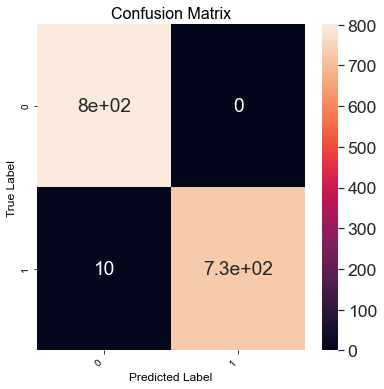

In [13]:
#Print confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(test_labels, test_prediction)
fig, ax = plt.subplots(figsize=(6,6))         # Sample figsize in inches
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, ax=ax)
ax.set_title('Confusion Matrix', fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
ax.set_ylabel('True Label', fontsize=12)
ax.set_xlabel('Predicted Label', fontsize=12)
target_names = ['Flooding', 'Regular_State']
print(classification_report(test_labels, test_prediction, target_names=target_names))

## 6. Evaluation of the Random Forest Model for a Random Image

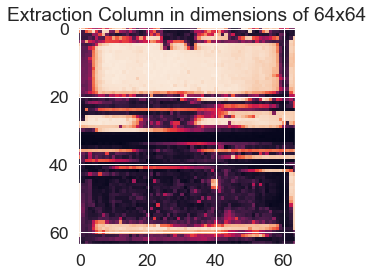

In [14]:
#Check results on a few random images
import random
n=random.randint(0, x_test.shape[0]-1) #Select the index of image to be loaded for testing
img = x_test[n]
plt.imshow(img)
plt.title('Extraction Column in dimensions of 64x64')
plt.show()

In [15]:
#Extract features and reshape to right dimensions
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_features=feature_extractor(input_img)
input_img_features = np.expand_dims(input_img_features, axis=0)
input_img_for_RF = np.reshape(input_img_features, (input_img.shape[0], -1))
#Predict
img_prediction = RF_model.predict(input_img_for_RF)
img_prediction = le.inverse_transform([img_prediction])  #Reverse the label encoder to original name
print("The prediction for this image is: ", img_prediction)
print("The actual label for this image is: ", test_labels[n])

The prediction for this image is:  ['Regular_State']
The actual label for this image is:  Regular_State


C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
